## Basic k-means and PCA in application to the hand-written digits dataset
The dataset is available directly in sklearn, see the documentation of the function load_digits(): 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html, 

or at UCI ML: https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

## Imports

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load the dataset from sklearn 

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

## Explore the data

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Check the size of the dataset: we have 1794 images of 8x8 pixels

In [4]:
digits.data.shape

(1797, 64)

### Target variable
The labels (digits corresponding to the image) are stored at `digits.targets`. The labels are numbers from 0 to 9. 

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Features are 8x8 black-and-white images of handwritten digits.

They are stored at `digit.images` as 8x8 numpy arrays.

In [9]:
digits.images.shape

(1797, 8, 8)

And they are also stored as flattened 64-dimensional numpy arrays at `digits.data`

In [10]:
digits.data.shape

(1797, 64)

`digits.images` is useful for visualisation of images

<Figure size 432x288 with 0 Axes>

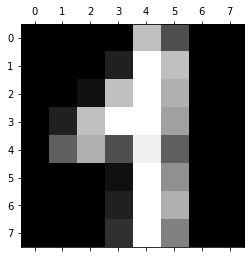

In [11]:
plt.gray()
plt.matshow(digits.images[42])
plt.show()

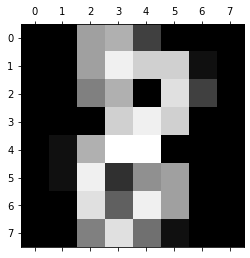

In [12]:
plt.matshow(digits.images[28])

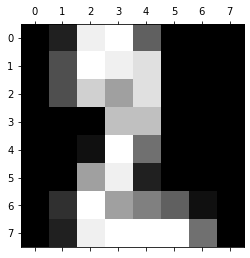

In [13]:
plt.matshow(digits.images[132])

## Apply PCA for visualisation

Use PCA from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce 64 dimensional feature vectors to dimension 2 for visualisation.

In [14]:
pca = PCA(n_components=2)
pca.fit(np.transpose(digits.data))

PCA(n_components=2)

Now we have a two-dimensional vector corresponding to each image.

In [15]:
pca.components_.shape

(2, 1797)

The function below can be used for visualisation of the digits data.

In [16]:
def plot_clusters(data, clusters, legend=False):
    """Visualises 2d-data using a different color for each cluster."""
    plt.figure(figsize=(12,10))
    colornames = list(mcolors.CSS4_COLORS.keys())
    random.Random(87).shuffle(colornames)
    plt.scatter(
        data[0], 
        data[1], 
        color=[colornames[t] for t in clusters]
    )
    if legend:
        clusters_ids = list(set(clusters))
        legend_elements = [
            Patch(facecolor=colornames[t], edgecolor='black', label=t) 
            for t in clusters_ids
        ]
        plt.legend(handles=legend_elements)
    
    

The cell below visualises the data and colors each point according to its label (e.g the digits '8' are blue).

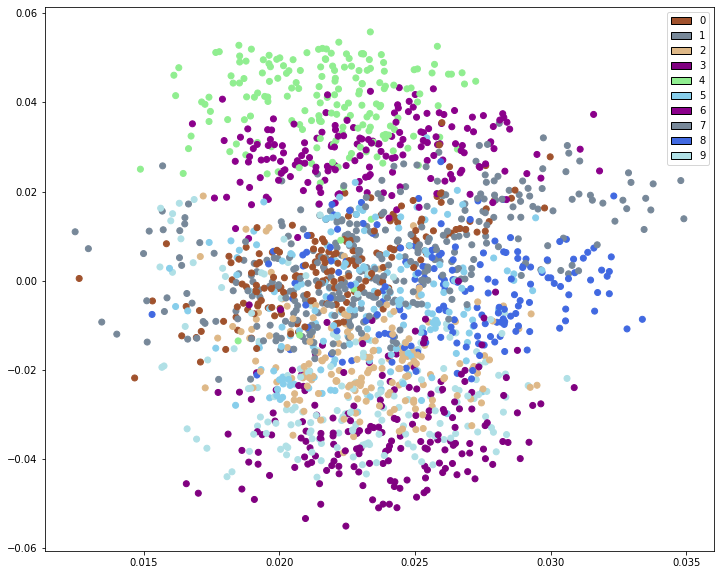

In [17]:
plot_clusters(pca.components_, digits.target, legend=True)

### Exercise 1. 
Pick a few outliers (points that are far from the main cloud) and look at the corresponding images using `plt.matshow`. Then pick a few points from the center of the cloud and look at them too. Compare the results.

In [18]:
### Enter your solution here...

## Apply k-means

Use k-means from sklearn to clusterize the digits data. 
We use k=10 as we know that we have only 10 types of digits.

In [19]:
kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(digits.data)

In [20]:
kmeans.shape

(1797,)

In [21]:
set(kmeans)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Visualise clusters from kmeans using pca components computed in the previous section.
Note that the poisitions of points are the same before, but colors might be a little different. 
The coloring now corresponds to the output of kmeans, not to the digit associated with the datapoint.

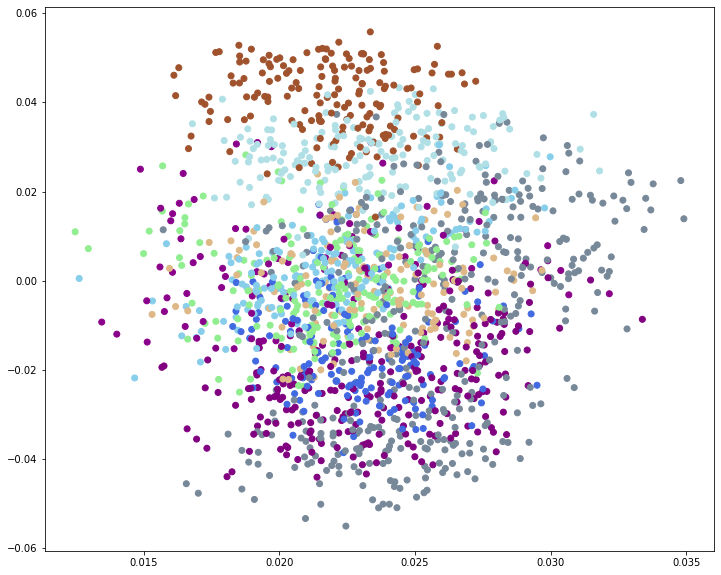

In [22]:
plot_clusters(pca.components_, kmeans)

## Check data from one cluster

Let's check the labels of the data from one cluster returned by k-means.

In [23]:
digits.target[kmeans == 0]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

We see that most of the images in this cluster correspond to the digit 4. Let's check the accuracy of predicting that all images in this cluster are 4.

In [24]:
cluster_4 = digits.target[kmeans == 0]
np.sum(cluster_4 == 4)/len(cluster_4)

0.9819277108433735

Here are the number from the "4" cluster that are not equal to 4. There are only 3 of them.

In [25]:
cluster_4[cluster_4 != 4]

array([5, 0, 5])

Let's visualise them.

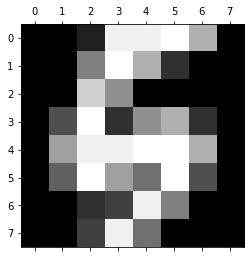

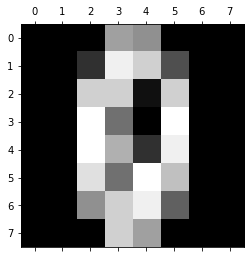

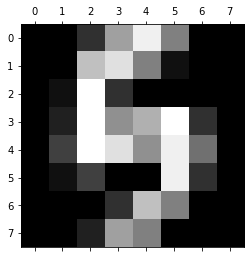

In [26]:
not_4_imgs = digits.images[(kmeans == 0) & (digits.target != 4)]
for img in not_4_imgs:
    plt.matshow(img)

### Exercise 2. 
Find the cluster that has the highest amount of non-dominant digits and visualise the non-dominant digits from that cluster.

In [27]:
### Enter your solution here...